# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv(
    "output/q4_features.csv",
    parse_dates=["Measurement Timestamp"],
    index_col="Measurement Timestamp",
)
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")
df.columns

Loaded 196,279 records with features


Index(['Station Name', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity',
       'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type',
       'Wind Direction', 'Wind Speed', 'Maximum Wind Speed',
       'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID',
       'Temperature Difference', 'Wind Speed Squared', 'Air Temperature (F)',
       'Comfort Index', 'Temp Ratio', 'Air Temperature Categories',
       'Wind Speed Categories'],
      dtype='object')

---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


## Generate Artifact 1 (q5_correlations.csv)

In [ ]:
# Load rolling features from Q4
rolling = pd.read_csv(
    "output/q4_rolling_features.csv", parse_dates=["Measurement Timestamp"]
).set_index("Measurement Timestamp")

# Merge rolling features with Q4 features dataframe
df_corr = df.join(rolling[["air_temp_rolling_24h", "wind_speed_rolling_7h"]])

# Select a set of meaningful numeric variables
cols = [
    "Air Temperature",
    "Wet Bulb Temperature",
    "Humidity",
    "Wind Speed",
    "Maximum Wind Speed",
    "Barometric Pressure",
    "Solar Radiation",
    # Engineered features from Q4
    "Temperature Difference",
    "Wind Speed Squared",
    "Air Temperature (F)",
    "Comfort Index",
    "Temp Ratio",
    # Rolling features
    "air_temp_rolling_24h",
    "wind_speed_rolling_7h",
]

# Compute the correlation matrix
corr_matrix = df_corr[cols].corr()

# Save Artifact 1
corr_matrix.to_csv("output/q5_correlations.csv")
print("Saved output/q5_correlations.csv with shape:", corr_matrix.shape)

corr_matrix

Saved output/q5_correlations.csv with shape: (14, 14)


,Air Temperature,Wet Bulb Temperature,Humidity,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Temperature Difference,Wind Speed Squared,Air Temperature (F),Comfort Index,Temp Ratio,air_temp_rolling_24h,wind_speed_rolling_7h
Air Temperature,1.000000,0.815079,0.009057,-0.080037,-0.074646,-0.206494,0.060634,0.494209,-0.003735,1.000000,0.999965,0.042248,0.977493,-0.169164
Wet Bulb Temperature,0.815079,1.000000,0.138824,-0.056612,-0.071874,-0.178902,0.050595,-0.100834,-0.003786,0.815079,0.816148,0.028219,0.812524,-0.132427
Humidity,0.009057,0.138824,1.000000,0.009218,0.034333,-0.158154,-0.027056,-0.192759,0.005023,0.009057,0.017404,-0.040476,0.066413,0.004184
Wind Speed,-0.080037,-0.056612,0.009218,1.000000,0.914770,-0.023890,-0.124633,-0.052497,0.937792,-0.080037,-0.079951,-0.003960,-0.078768,0.377461
Maximum Wind Speed,-0.074646,-0.071874,0.034333,0.914770,1.000000,0.006303,-0.114277,-0.020336,0.845455,-0.074646,-0.074351,0.000012,-0.086965,0.390928
Barometric Pressure,-0.206494,-0.178902,-0.158154,-0.023890,0.006303,1.000000,-0.001776,-0.086156,-0.002172,-0.206494,-0.207791,0.001747,-0.215451,-0.048721
Solar Radiation,0.060634,0.050595,-0.027056,-0.124633,-0.114277,-0.001776,1.000000,0.028205,-0.135015,0.060634,0.060401,0.002869,0.047599,-0.027349
Temperature Difference,0.494209,-0.100834,-0.192759,-0.052497,-0.020336,-0.086156,0.028205,1.000000,-0.000734,0.494209,0.492545,0.030243,0.459391,-0.091788
Wind Speed Squared,-0.003735,-0.003786,0.005023,0.937792,0.845455,-0.002172,-0.135015,-0.000734,1.000000,-0.003735,-0.003693,0.000149,-0.005719,0.251338
Air Temperature (F),1.000000,0.815079,0.009057,-0.080037,-0.074646,-0.206494,0.060634,0.494209,-0.003735,1.000000,0.999965,0.042248,0.977493,-0.169164


## Generate Artifact 2 (q5_patterns.png)

/var/folders/5w/6rlwfykx6274ngzhynds5b_h0000gn/T/ipykernel_16906/3337150798.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df["Air Temperature"].resample("M").mean().dropna()


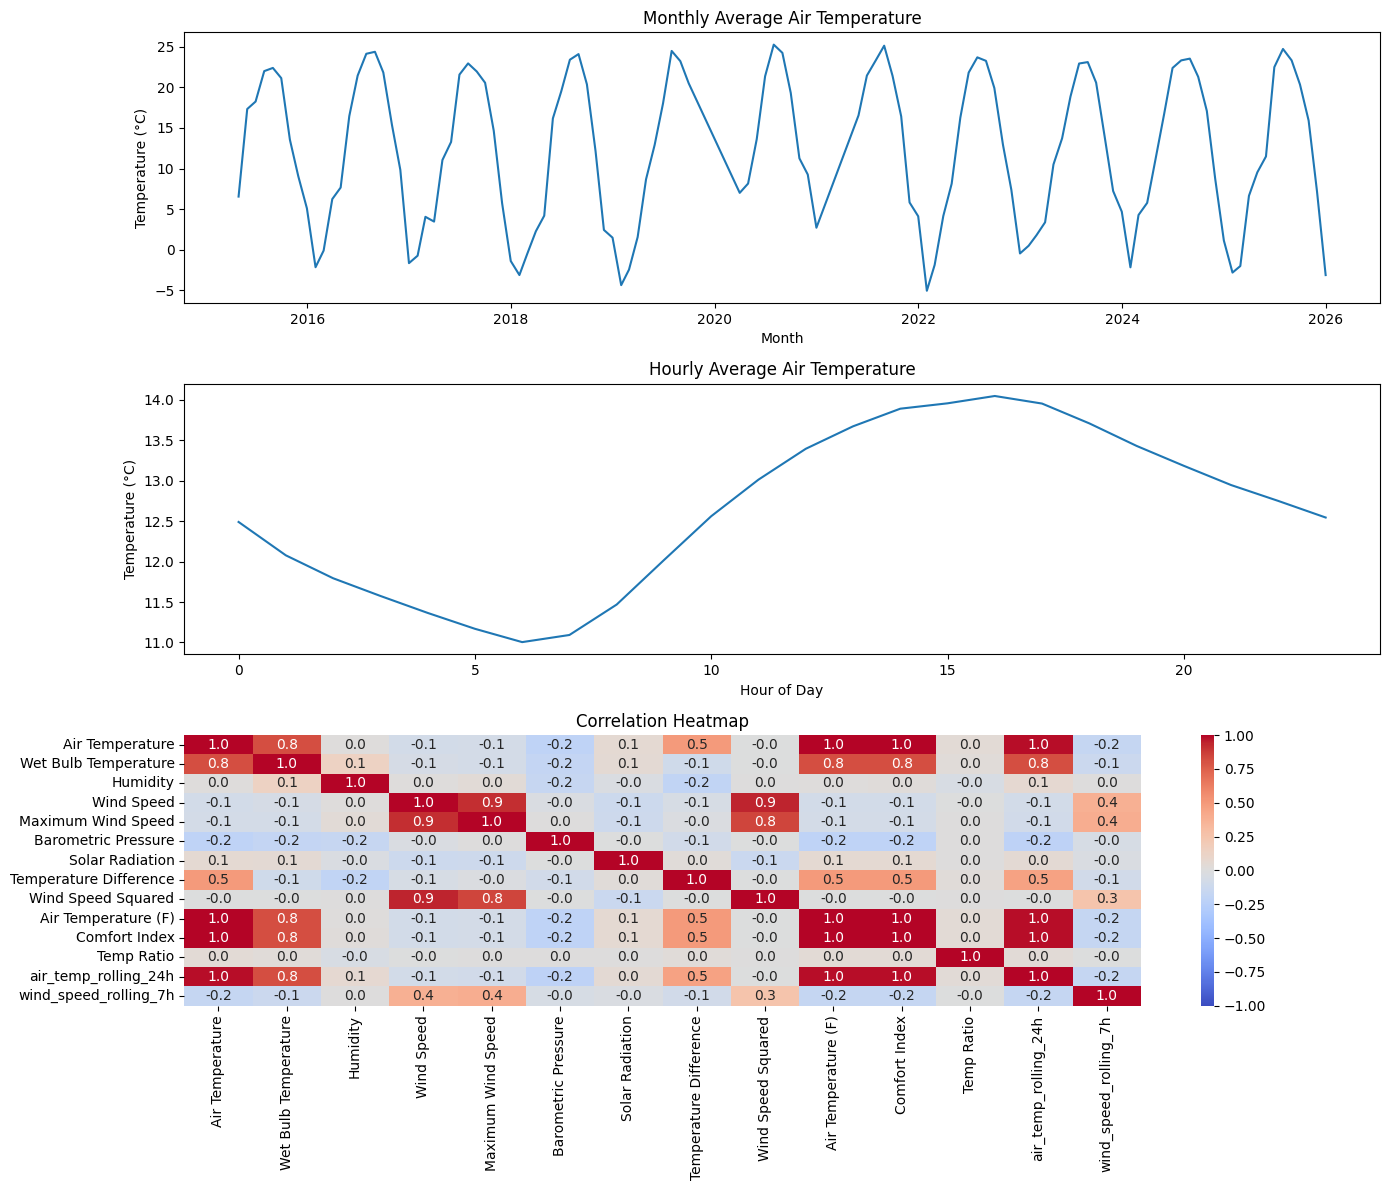

Saved output/q5_patterns.png


In [ ]:
plt.figure(figsize=(14, 12))

# Panel 1: Monthly trend
monthly = df["Air Temperature"].resample("M").mean().dropna()
plt.subplot(3, 1, 1)
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Average Air Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")

# Panel 2: Hourly seasonal pattern
df["hour"] = df.index.hour
hourly = df.groupby("hour")["Air Temperature"].mean()

plt.subplot(3, 1, 2)
plt.plot(hourly.index, hourly.values)
plt.title("Hourly Average Air Temperature")
plt.xlabel("Hour of Day")
plt.ylabel("Temperature (°C)")

# Panel 3: Correlation heatmap
plt.subplot(3, 1, 3)
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.savefig("output/q5_patterns.png", dpi=150)
plt.show()

print("Saved output/q5_patterns.png")

## Generate Artifact 3 (q5_trend_summary.txt)

In [ ]:
import calendar

summary_lines = []
summary_lines.append("KEY PATTERNS IDENTIFIED:")
summary_lines.append("=======================")
summary_lines.append("")

# Temporal trends
temp_min = monthly.min()
temp_max = monthly.max()

# Identify seasonal narrative
warmest_month = monthly.idxmax().strftime("%B %Y")
coolest_month = monthly.idxmin().strftime("%B %Y")

summary_lines.append("TEMPORAL TRENDS:")
summary_lines.append(
    "- Air Temperature exhibits a pronounced seasonal cycle across the dataset."
)
summary_lines.append(
    f"- Temperatures peak during midsummer, with the warmest month observed in {warmest_month}."
)
summary_lines.append(
    f"- The coldest period occurs in {coolest_month}, consistent with typical winter cooling."
)
summary_lines.append(
    f"- Over the full record, monthly average air temperature ranges from {temp_min:.2f}°C to {temp_max:.2f}°C, indicating substantial seasonal swing."
)
summary_lines.append("")

# Daily / weekly patterns
df["dayofweek"] = df.index.dayofweek
hum_by_dow = df.groupby("dayofweek")["Humidity"].mean()

hum_min = hum_by_dow.min()
hum_max = hum_by_dow.max()

# Days with highest humidity
top_days = hum_by_dow.sort_values(ascending=False).index[:2]
top_day_names = [calendar.day_name[int(d)] for d in top_days]

summary_lines.append("DAILY PATTERNS:")
summary_lines.append(
    "- Humidity shows a subtle weekly rhythm, with certain days tending to be slightly more humid than others."
)
summary_lines.append(
    f"- The most humid days on average are {top_day_names[0]}s and {top_day_names[1]}s, suggesting periodic moisture patterns possibly linked to weather cycles."
)
summary_lines.append(
    f"- Across the week, average humidity ranges between {hum_min:.2f}% and {hum_max:.2f}%, indicating generally stable atmospheric moisture."
)
summary_lines.append("")

# Correlations
summary_lines.append("CORRELATIONS:")

# Choose correlations that are *interesting*, not engineered
interesting_pairs = [
    ("Air Temperature", "Wet Bulb Temperature"),
    ("Wind Speed", "Maximum Wind Speed"),
    ("Humidity", "Solar Radiation"),
]

for var1, var2 in interesting_pairs:
    r = corr_matrix.loc[var1, var2]
    summary_lines.append(
        f"- {var1} and {var2} show a correlation of {r:.2f}, "
        + (
            "indicating strong alignment between temperature-related measures."
            if var1.startswith("Air") and "Wet Bulb" in var2
            else "reflecting expected physical relationships between wind metrics."
            if "Wind" in var1 and "Wind" in var2
            else "suggesting clearer, sunnier conditions tend to coincide with lower atmospheric moisture."
        )
    )

# Save file
with open("output/q5_trend_summary.txt", "w") as f:
    f.write("\n".join(summary_lines))

print("Saved output/q5_trend_summary.txt")

Saved output/q5_trend_summary.txt
